In [31]:
# Import libraries to use the associated methods
# Ensure plots renders inside the notebook 
%matplotlib inline
# Manipulate dataframe
import pandas as pd
# Manipulate spatial data
import geopandas as gpd
# Manipulate arrays and matrices
import numpy as np
# Spatial Analysis
import pysal
# Add basemap to the maps
import contextily as ctx
# General visualization utiities
import matplotlib.pyplot as plt
# Cluster Analyis
from sklearn import cluster
# Plot charts, histograms, scatterplots
import seaborn as sns
# Exploratory Spatial Data Analysis
import esda
# Weighted spatial matrix
from pysal.lib import weights
# Global spatial autocorrelation, Local Spatial Clusters and plot local autocorrelation
from splot.esda import moran_scatterplot

## Introduction
The relationship between non-citizens and income has been reviewed across the years in multiple research (Ortega and Peri, 2013; Camarota, 1999; Picot et al, 2009) supporting the positive social and economic effect of the naturalization on non-citizens (Capps and Echeverría-Estrada, 2020). Currently, 46% of Toronto's total population is foreign-born (Canadian Census 2016) adn as immigrants have changed the city across the years, another force has been recently shaping it: Airbnb. 
The naturalization process is key to improve non-citizens' wealth (Pastor et. al, 2012) with housing at the core of the process both socially and financially (Alba and Logan, 1993: Painter and Qian, 2016). 
Is Airbnb an obstacle in this process?
The research extends previous findings concerning citizenship status, income and non-citizen wealth while creating a link with the spatial relationship between Airbnb and affordable housing. Two datasets are used: 'Neighborhood Profiles' both for general profiling and housing conditions and a Toronto Airbnb dataset from the 'Inside Airbnb' project. 

In [2]:
# read the main file and load neighborhoods of the City of Toronto
neis = gpd.read_file("https://darribas.org/gds_course/_downloads/a2bdb4c2a088e602c3bd6490ab1d26fa/toronto_socio-economic.gpkg")

In [3]:
# Read Neighbourhood Profiles Housing file to get information on housing conditions and affordability
housing = pd.read_csv('/Users/Andrea/OneDrive - The University of Liverpool/GDS/Computational Essay/data/Open Data Toronto/neighbourhood-profiles-2016-housing.csv', thousands=',')

In [4]:
# Merge Housing dataframe with Neis dataframe and append geometry by neighborhood name
neis = neis.merge(housing,
                   on="neighbourhood_name")

In [5]:
# Calculate new column 'Owner in %' as total households living in a private owned property
neis['Owner in %'] = neis['Owner'] / neis['Total - Private households by tenure - 25% sample data']
# Calculate new column 'Renter in %' as total households living in a private rented property
neis['Renter in %'] = neis['Renter'] / neis['Total - Private households by tenure - 25% sample data']

In [6]:
# Standardize Canadian citizenship variable by the total population
neis['citizen_std'] = neis['canadian_citizens'] / neis['population2016']

***
## Part I

'Median Income' and 'Canadian Citizens' are the variables selected. Citizenship is standardized by the total population in a neighborhood. The median income is positively skewed and with a relevant variance. This may suggest that some neighborhoods have an asymmetrical high income. On the other hand, the number of citizens has a minimum variance and an unskewed distribution. This balanced distribution is shared among the other variables selected to study housing conditions (Table 1). Finally, given these distributions, income is mapped with a Fisher-Jenks scheme and citizenship with a quantile scheme. 

As previous studies have also shown (Couture et al., 2020), high-income earners tend to concentrate in the city-center area. On the other hand, Canadian citizens diminish progressively away from the waterfront with a some high value in the city-center. To capture the degree of income and citizenship spatial autocorrelation at the global level the Moran's Is are calculated.

Income does not globally cluster given the low Moran's I value (0.16), while citizenship is more globally clustered (Moran's I: 0.44). This means that Canadian citizens tend to live between other Canadians and the opposite may hold. Both values are statistically significant, even using a confidence interval of 99% (p-values: 0.2% and 0.1%).

In [9]:
# Descriptive statistics for selected variables at the neighborhood level
variables = neis[['hh_median_income2015', 'citizen_std','Rate of unaffordable housing', 'Rate of inadequate housing', 'Rate of unsuitable housing',
      'Owner in %', 'Renter in %']]
variables.describe()

hh_median_income2015  citizen_std  Rate of unaffordable housing  \
count            140.000000   140.000000                    140.000000   
mean            7949.464286     0.687612                     35.072143   
std             4795.182223     0.059357                      6.939441   
min             2650.000000     0.488677                     17.500000   
25%             5140.000000     0.646968                     31.075000   
50%             6572.500000     0.690281                     35.600000   
75%             9537.500000     0.733695                     38.525000   
max            40750.000000     0.800994                     56.500000   

       Rate of inadequate housing  Rate of unsuitable housing  Owner in %  \
count                  140.000000                  140.000000  140.000000   
mean                     7.413571                   12.012143    0.546967   
std                      2.446587                    6.845946    0.163546   
min                      2.000000                    1.400000    0.099895   
25%                      5.600000                    6.900000    0.434928   
50%                      7.100000                   10.800000    0.550741   
75%                      9.325000                   15.850000    0.647294   
max                     13.600000                   42.200000    0.933865   

       Renter in %  
count   140.000000  
mean      0.452958  
std       0.163505  
min       0.063854  
25%       0.353115  
50%       0.449639  
75%       0.563984  
max       0.900628

In [ ]:
# Find neighborhood with highest median income
neis['neighbourhood_name'].loc[neis['hh_median_income2015'] == neis['hh_median_income2015'].max()]

In [ ]:
# Change the web marcator to add basemap to the plot
neis = neis.to_crs(epsg=4326)

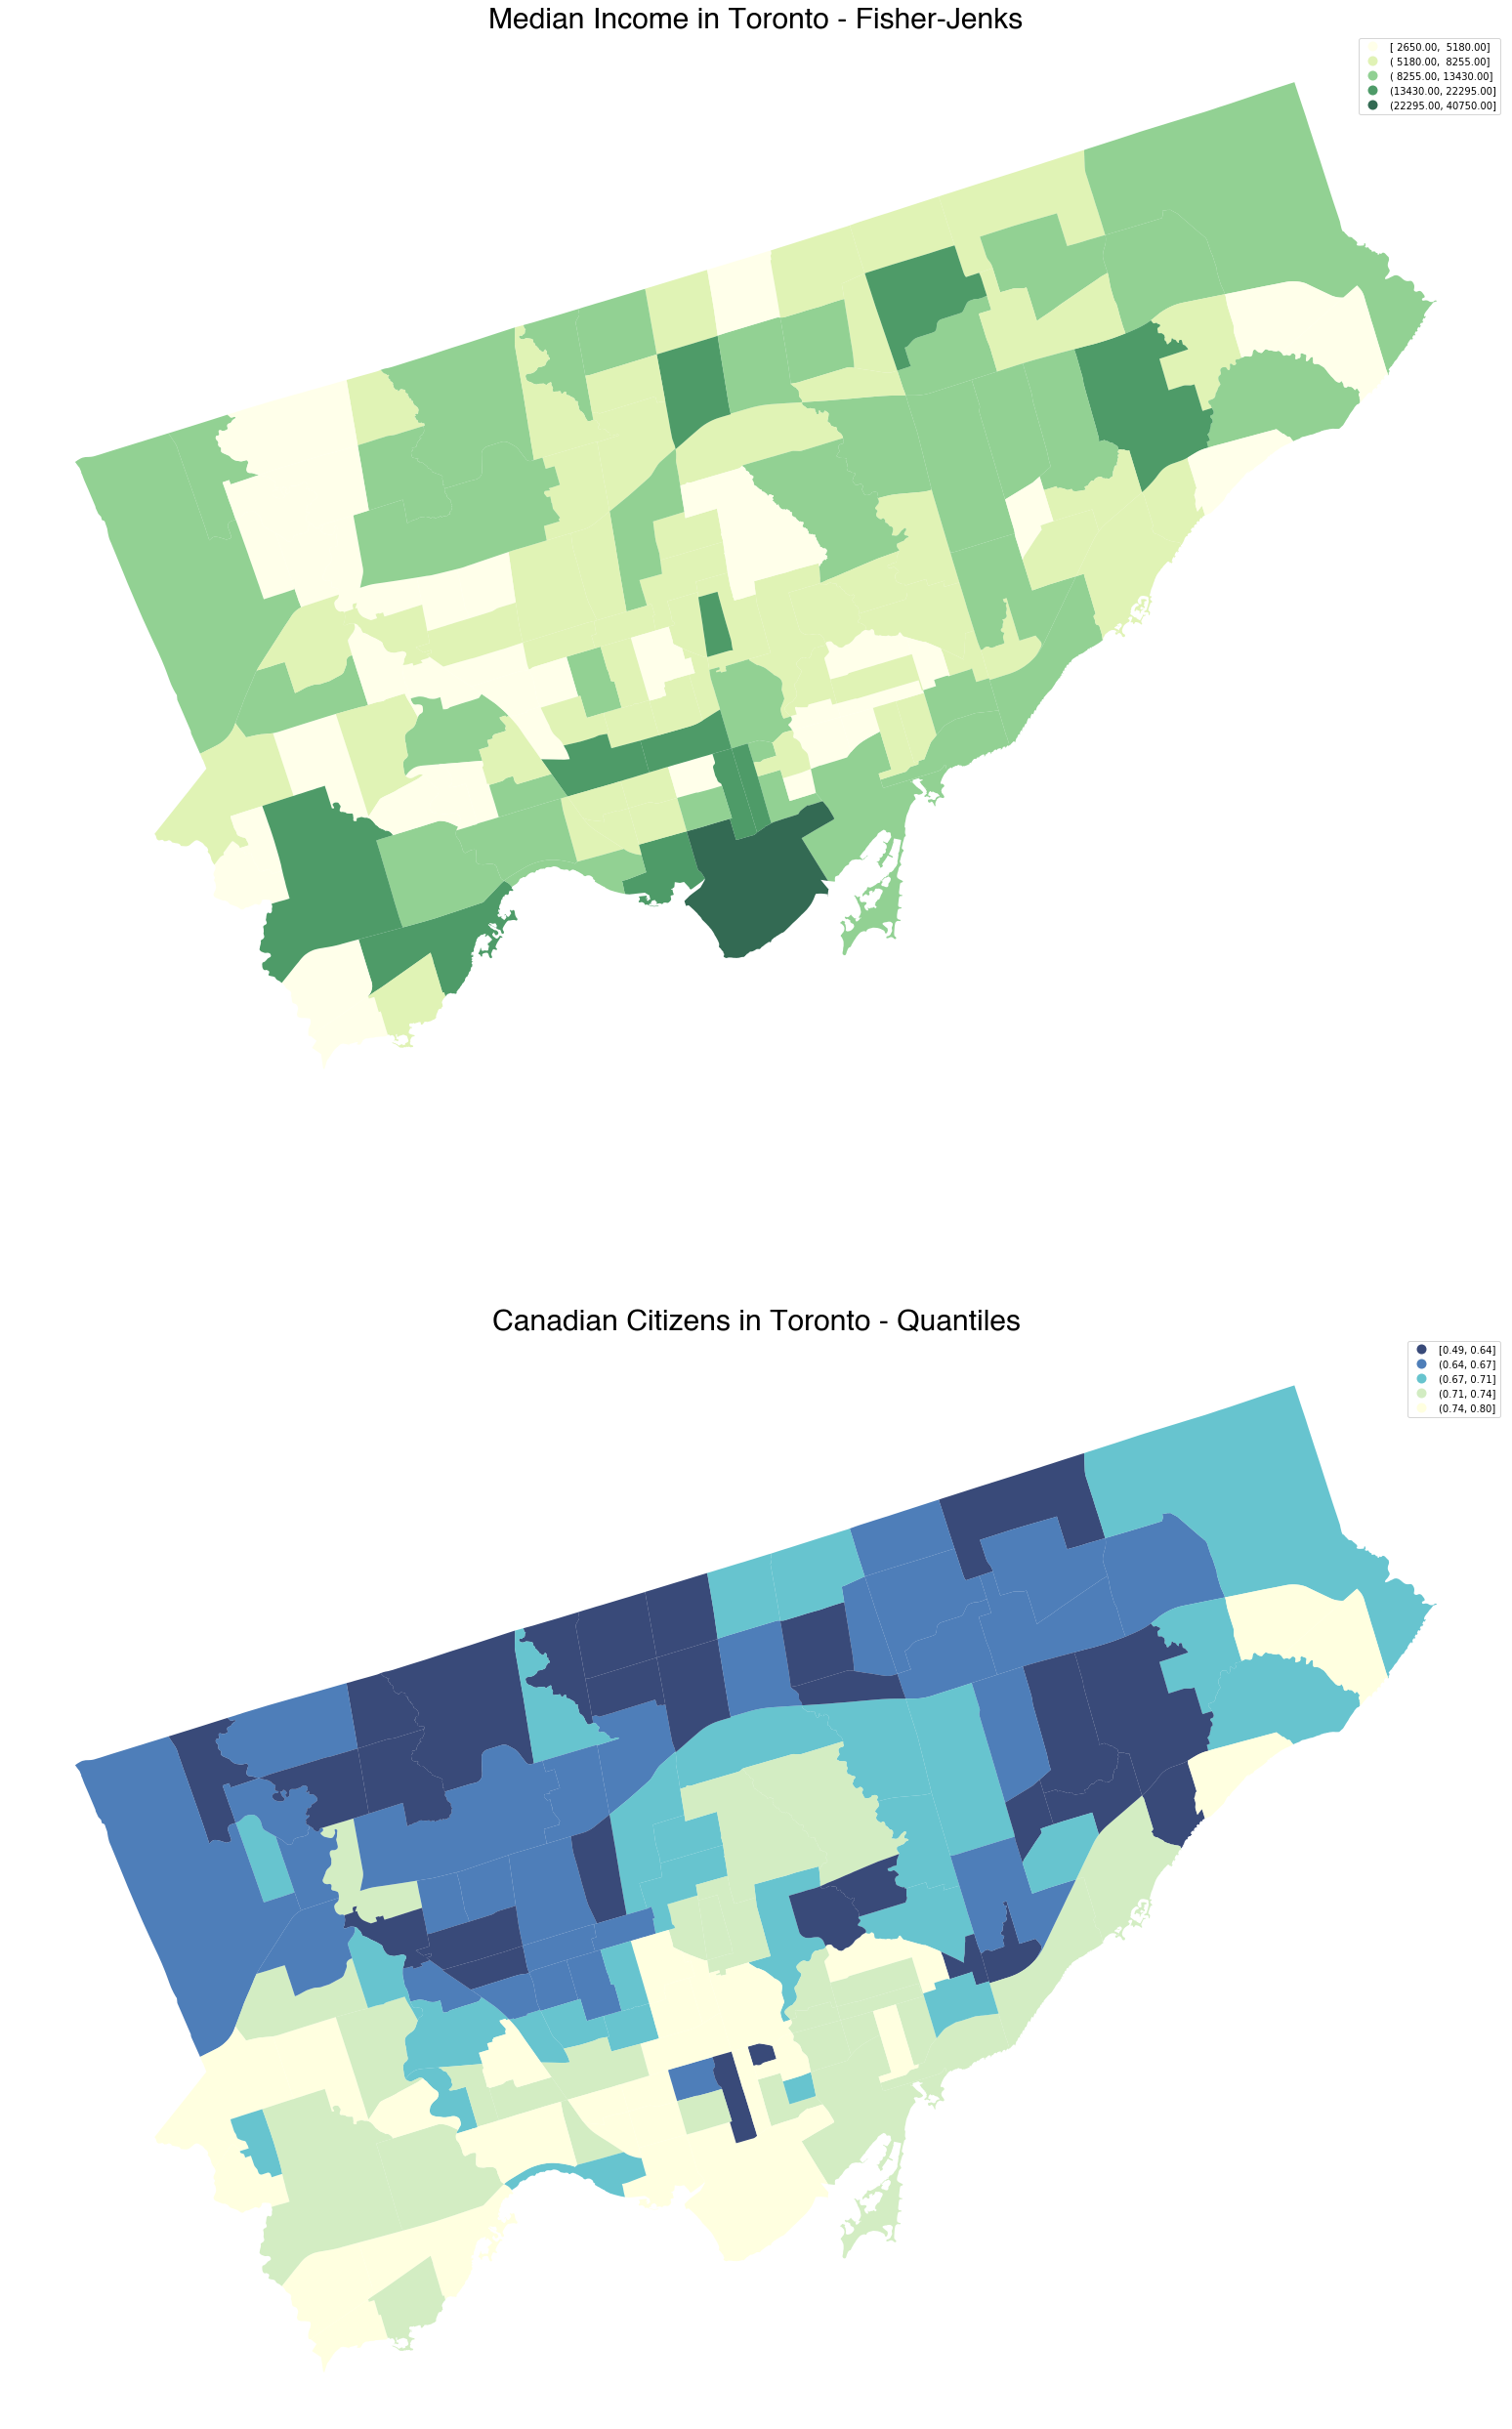

In [10]:
# Set the figure with 2 rows and 1 column and figure size by 45x45
f,axs = plt.subplots(2,1,figsize=(45,45))

## Figure One
# Plot Median Income using a Fisher-Jenks classification scheme, 5 groups and trasparency of 80%
neis.plot(ax=axs[0],
          column='hh_median_income2015',
          scheme= 'fisher_jenks', 
          k=5, 
          alpha=0.8,
          cmap="YlGn", 
          legend=True
          )

# Add title with a font size of 30 and Helvetica font
axs[0].set_title('Median Income in Toronto - Fisher-Jenks',
                 fontsize=30,
                 fontname= 'Helvetica'
                )

# Remove axis
axs[0].set_axis_off()

## Figure Two
# Plot standardized citizenship using a quantiles classification scheme, 5 groups and trasparency of 80%.
# The color scheme is also reversed to better capture the non-citzens rather than the citizens out of the total population
neis.plot(ax=axs[1],
          column='citizen_std',
          scheme= 'quantiles', 
          k=5, 
          alpha=0.8,
          cmap="YlGnBu_r",
          legend=True
          )

# Set Title Map
axs[1].set_title('Canadian Citizens in Toronto - Quantiles',
                fontsize=30,
                fontname = 'Helvetica'
                )

# Remove axis
axs[1].set_axis_off()

# Show figure
plt.show()

In [ ]:
# Create a weighted Queen spatial matrix, using the existing ID as index
w = weights.Queen.from_dataframe(neis, idVariable="_id")

# Standardize the matrix using the sum of the rows as criterion
w.transform = 'R'

In [ ]:
# Calculate Moran's I for median income
income_mi = esda.Moran(neis['hh_median_income2015'], w)
# Display it
income_mi.I

In [ ]:
# Calculate p-value of the Moran's I for the median income
income_mi.p_sim

In [ ]:
# Calculate Moran's I for Canadian citizens standardized
citizen_mi = esda.Moran(neis['citizen_std'], w)
citizen_mi.I

In [196]:
# Calculate p-value of the Moran's I for Canadian citizens standardized
citizen_mi.p_sim

0.001

***

## Part II
#### Do housing conditions somehow drive clusterization and what's the role of Airbnb in creating unaffordable housing?

The ‘Inside Airbnb’ project defines as ‘highly available’ a listing that is bookable for more than 90 days in a year. These houses should be considered out of the rental market, potentially causing population displacement and decreasing affordability (Wachsmuth et al., 2017). Currently, 37.8% of the total listings can be classified as highly available in Toronto, potentially accomodating 21,864 people.

The rate of housing that has been identified as inadequate, unaffordable or unsuitable is subset into three classes using a K-Means algorithm and grouped by the rate of unaffordable housing. The first map from the top shows the K-Means clusters and the Airbnb listings of high available houses. Airbnb may have an impact on the quality of the housing affordability (47% of the houses are unaffordable in group 0) in multiple areas such as Downtown or Newtownbrook. Group 1 has values on average (39% compared to 38% city mean) and group 2 has a lower level of unaffordable housing (31%). The second map further expands on this topic, showing only the bottom 25% of neighborhoods by citizens residents with the Airbnb data. Only one neighborhood around the North York area seems affected by the platform while others may not be. The last map plots the percentage of renters out of the total residents suggesting that Airbnb drives less ownership and more renting due to its effects on real estate prices (Barron et al. 2017). Moreover, it might generate forms of inequalities disproportionately affecting the majority of households (renters) to the advantage of a few commercial operators (Combs et. al, 2020).

In [11]:
# Read CSV Airbnb file on Toronto
df = pd.read_csv('/Users/Andrea/OneDrive - The University of Liverpool/GDS/Computational Essay/data/airbnb/listings 2.csv')

In [12]:
# Transform the current Airbnb dataframe in a geodataframe 
# Convert lon/lat into Point objects and setting CRS
airbnb = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude,crs="EPSG:4326"))

In [13]:
# Create 'High Available Houses' selecting Airbnb listings available more than 90 days 
high_available_houses = airbnb.loc[airbnb['availability_365'] > 90]

In [14]:
# Create new column with name in common of the neighborhood database to perform the join
airbnb['neighbourhood_name'] = airbnb['neighbourhood_cleansed']

In [15]:
# Check if the two mercator projections are equal before merging the dataset
airbnb.crs == neis.crs

True

In [16]:
# Aggregate the number of airbnb listings by neighbourhood
airbnb_per_neis = airbnb.groupby("neighbourhood_name").size()
# Assign them into a table of its own 
# and joins it to the areas table
neis = neis.join(pd.DataFrame({"airbnb_listings": airbnb_per_neis}),
                   on="neighbourhood_name")

In [17]:
# Merge Neighborhood Profile dataset with Airbnb dataset
neis_airbnb = neis.merge(airbnb, on='neighbourhood_name')
# Transform the merged dataset in a geodataframe, set the geometry from neighborhood dataset and crs
neis_airbnb = gpd.GeoDataFrame(
    neis_airbnb, geometry=neis_airbnb['geometry_x'], crs="EPSG:4326")

In [18]:
# Create variable
housing_in_need = ['Rate of unaffordable housing', 'Rate of inadequate housing','Rate of unsuitable housing' ]

In [19]:
# Set number of cluster and random state to make sure every time K-Means runs start with the same centroid.
# This makes sure that it is the same and reproducible.
# The K-Means algorithm is an iterative procedure that groups unlabelled datasets minimizing the variance inside each predefined number of subsets.
kmeans5 = cluster.KMeans(n_clusters=3, random_state=12345)

In [20]:
# Run the clustering algorithm
k5cls = kmeans5.fit(neis_airbnb[housing_in_need])

In [21]:
# Create a new column in the dataframe with the labels assigned by the K-Means
neis_airbnb['k5cls'] = k5cls.labels_

In [22]:
# Calculate the mean of the K-Means groups
k5means = neis_airbnb.groupby('k5cls')["Rate of unaffordable housing"].mean()

In [23]:
# Calculate the size of each K-Means class created i.e. how many Airbnb listings belong to each class
k5sizes = neis_airbnb.loc[neis_airbnb['availability_365']>90].groupby('k5cls').size()

In [24]:
# Calculate percentage of Group 0 (High Rate of Unaffordable Housing) over the total K-Means groups
k5sizes[0]/sum(k5sizes)

0.17765379533108208

In [25]:
# create a class to assign a categorical variable to each k-mean group
def ava_status(i):
    if i == 0:
        return 'High'
    if  i == 1:
        return 'On Average'
    elif i == 2:
        return 'Low'

In [26]:
# iterate over the dataframe to apply the ava_status function 
# create a new "Classification" column containing values from the functon
neis_airbnb['Classification'] = neis_airbnb['k5cls'].apply(ava_status)


In [27]:
# check if every row has been assigned to a k-mean group and it has a classification availability status
print (neis_airbnb['k5cls'].isnull().values.any(),
       neis_airbnb['Classification'].isnull().values.any())

False False


In [34]:
# Create a new subset from the merge between Airbnb and Neighborhood Profiles
# with the same columns of the 'Variables' subset (see Table 1 in Part I) but adding the 'Classification' column
variables = neis_airbnb[['hh_median_income2015', 'citizen_std','Rate of unaffordable housing', 'Rate of inadequate housing', 'Rate of unsuitable housing',
      'Owner in %', 'Renter in %', 'Classification']]

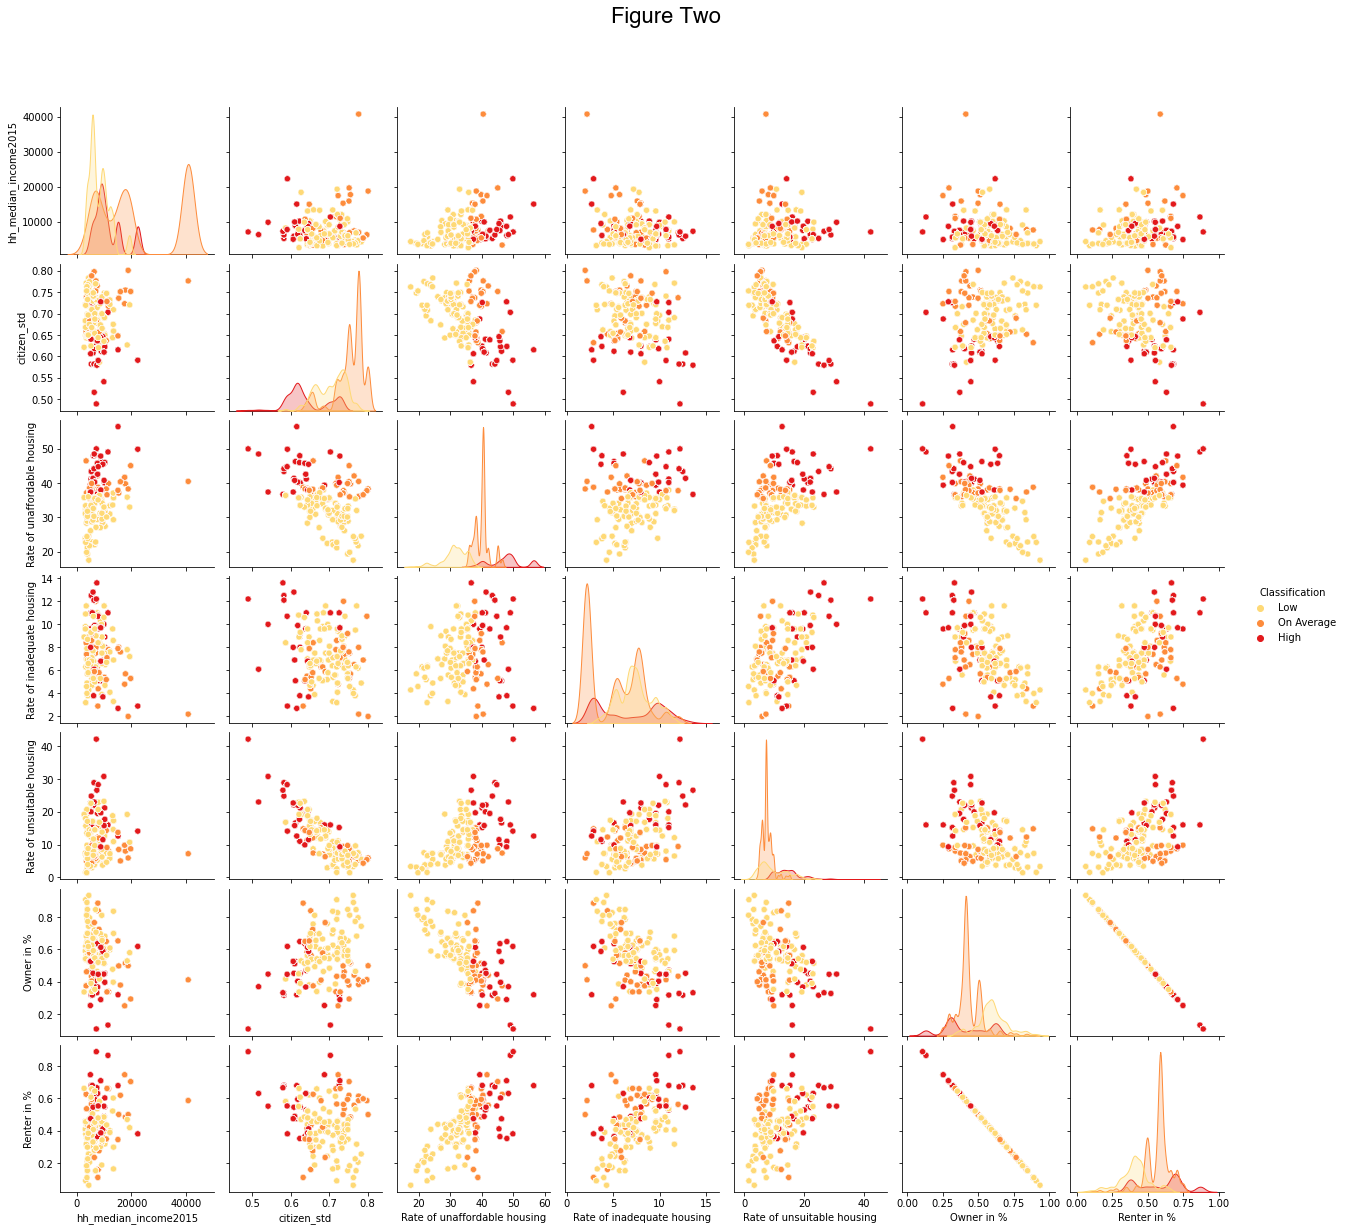

In [35]:
# Plot the Median Income, Citizens, Rate of unaffordable, inadequate and unsuitable, owners and renters in percentage
# grouped by the K-Means Classification
# Set size per scatterplot to 2.5x2.5 and a ColorBrew palette for the classification
g = sns.pairplot(variables, hue="Classification", height=2.5, aspect=1, palette='YlOrRd')

# Set title of the whole figure with a size of 12 and in Helvetica font
g.fig.suptitle('Figure Two', fontsize=22, fontname='Helvetica')
# Adjust the figure to have some margin from the title
g.fig.subplots_adjust(top=0.90)

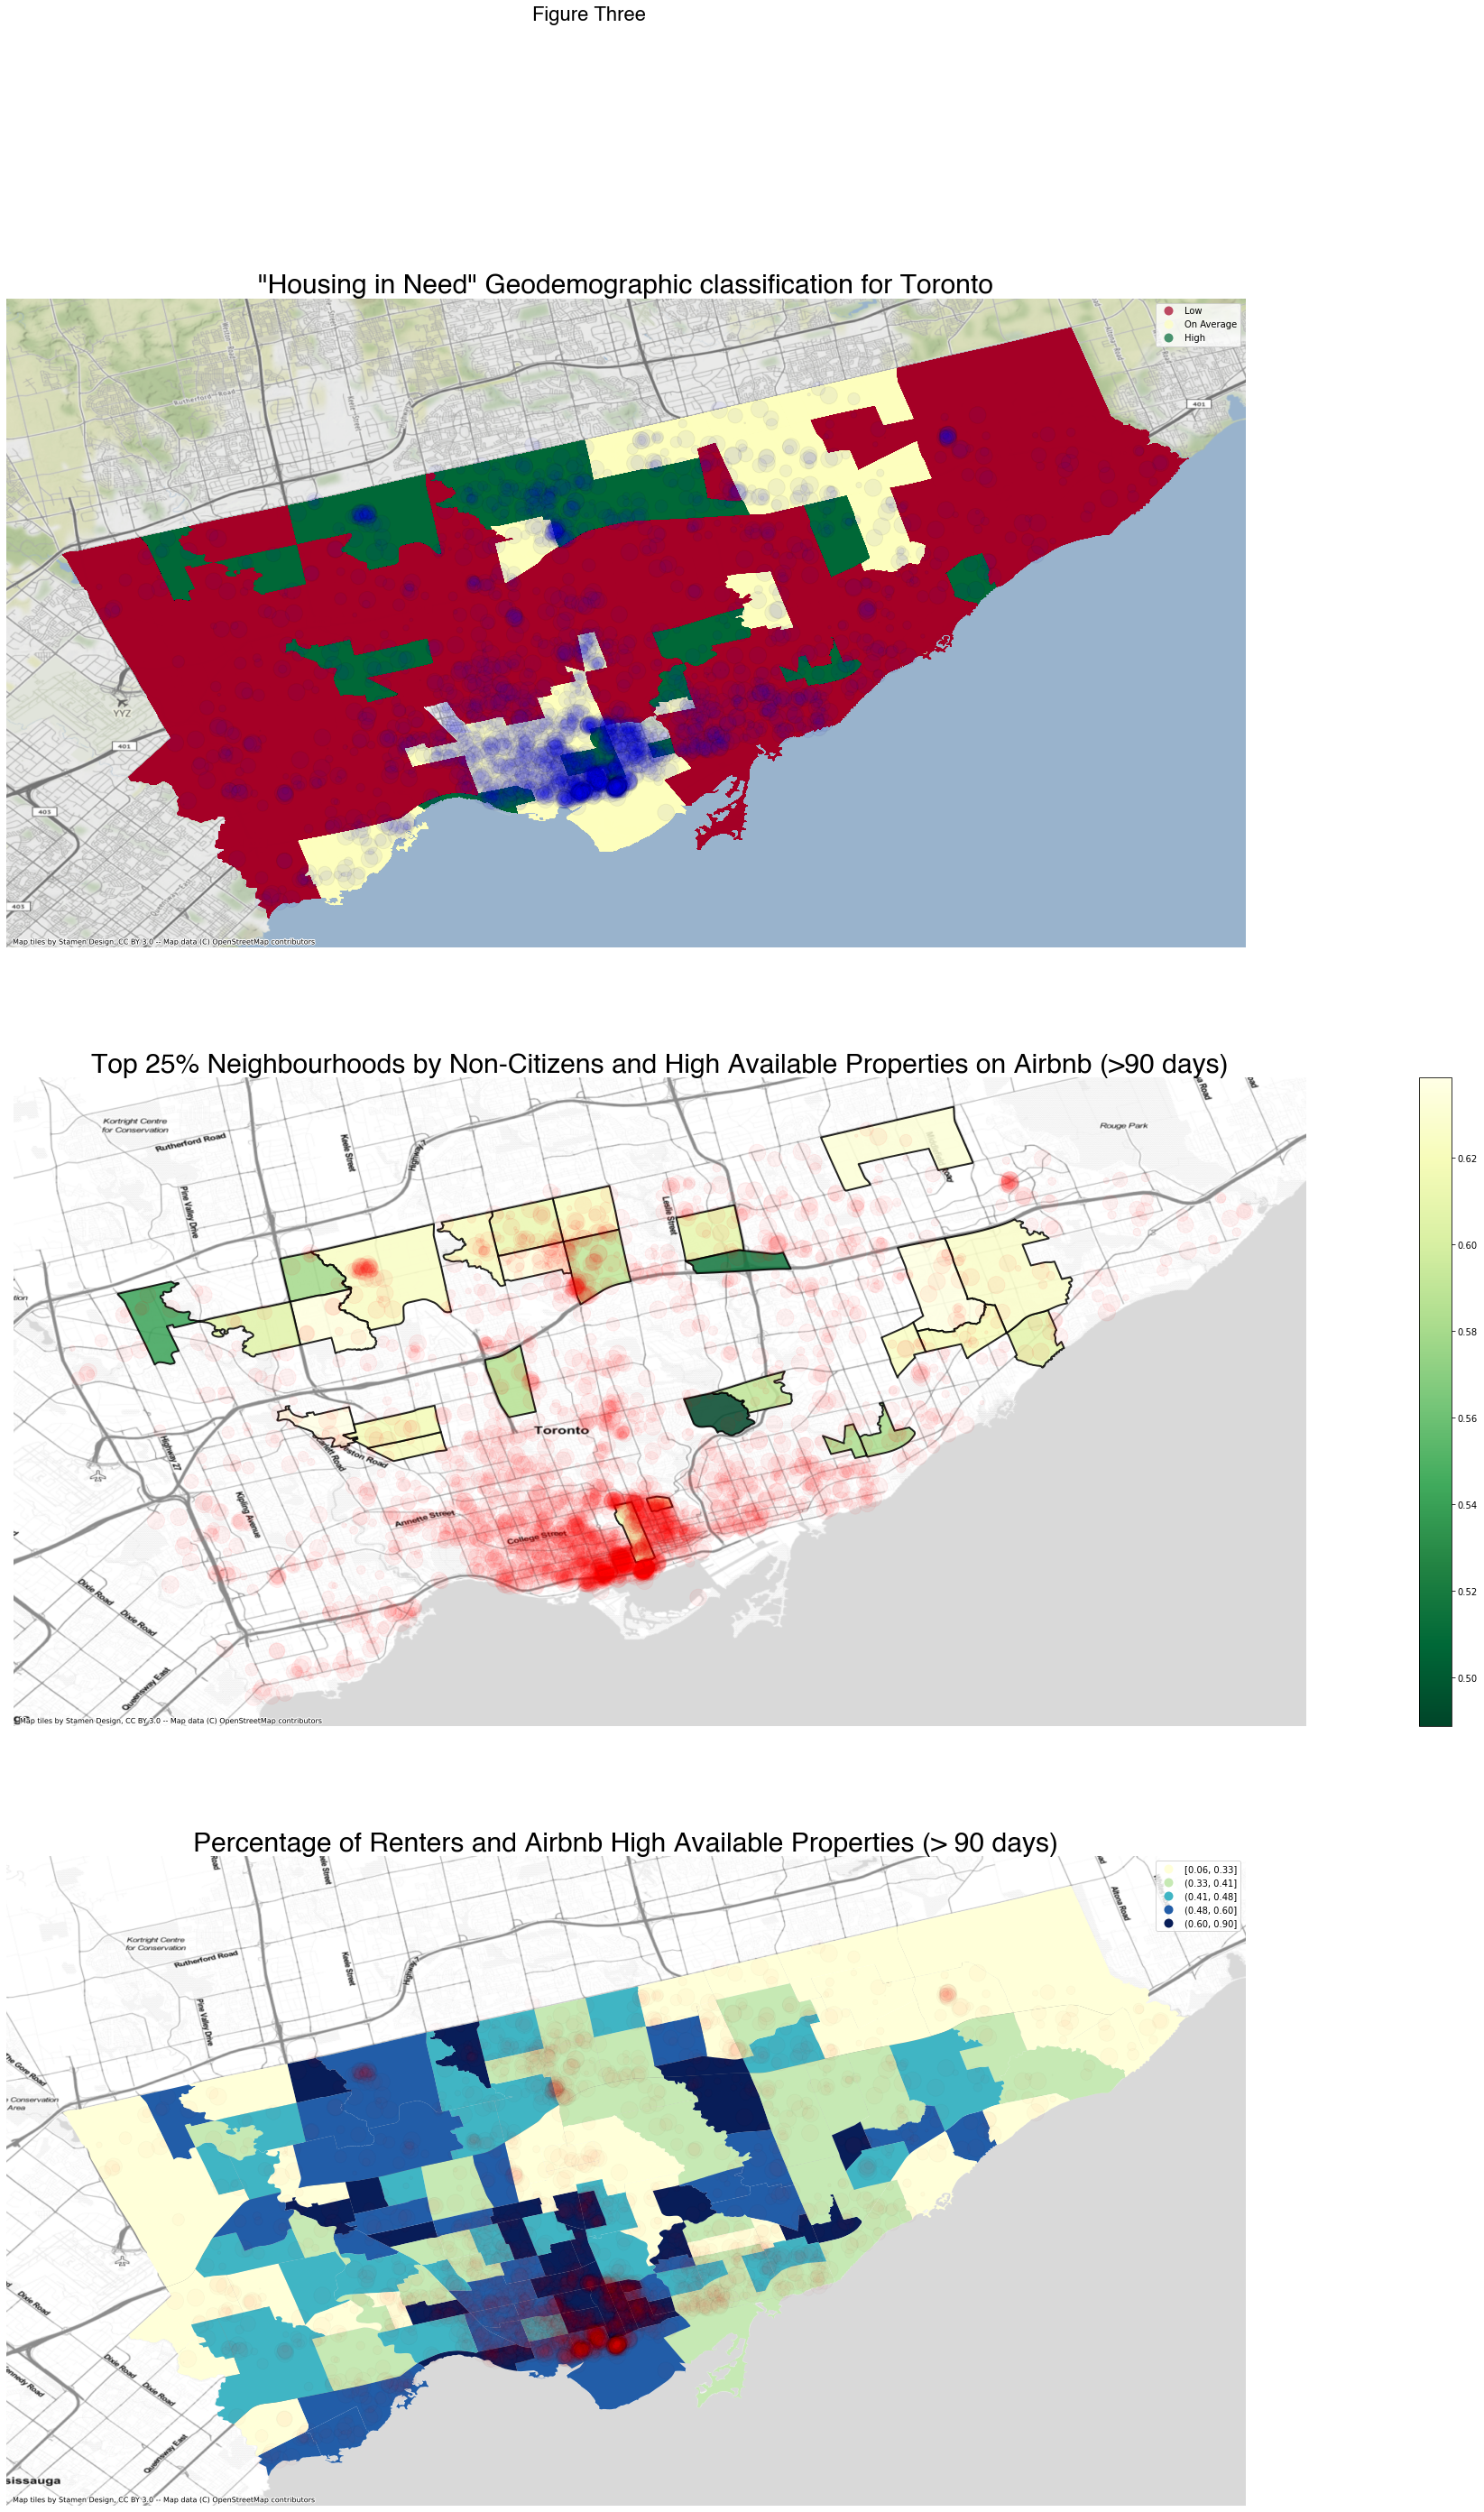

In [36]:
# Plot the map with the K-Means group
# Setup figure with 3 rows and 1 column and 45x45 size
f, axs = plt.subplots(nrows=3, ncols=1, figsize=(45,45))
# Set title of the whole figure with a size of 22 and in Helvetica
f.suptitle('Figure Three', fontsize=22, fontname='Helvetica')
# Figure One
# Plot 'Classification' with a categorical choropleths defined by 'Low', 'On Average', 'High' values
# including a legend with no boundary lines, colors ordered by categories, transparency set to 70% 
neis_airbnb.plot(ax=axs[0],
                 column='Classification', 
                 categorical=True,
                 legend=True, 
                 linewidth=0, 
                 cmap='RdYlGn',
                 alpha=0.7,
                 categories=['Low', 'On Average', 'High']
                )

# Plot the locations with high available (>90 days) Airbnb listings i.e. out of the rent market
# Each point is colored in blue with transparency set to 5% and an outline in black
# The size of each point is proportional to the number of the days the listing is available
high_available_houses.plot(ax=axs[0],
                           markersize=airbnb['availability_365'],
                           color= 'blue',
                           alpha=0.05,
                           linewidth=1,
                           edgecolor='black', 
                          )
# Remove axis
axs[0].set_axis_off()

# Add title with a font size of 30 and Helvetica font
axs[0].set_title('"Housing in Need" Geodemographic classification for Toronto',
                fontsize=30,
                fontname='Helvetica')

# Add basemap and set crs equal to the database plotted
ctx.add_basemap(ax=axs[0], crs=high_available_houses.crs.to_string())

# Figure Two
# Plot top 25% of the neighbourhoods by non-Canadian citizens on percentage (see Table 1), transparency set to 70%,
# Outline with 2 width and colored in blacked.
neis.loc[neis['citizen_std'] < 0.64].plot(
                    ax=axs[1],
                    column='citizen_std',
                    alpha=0.85,
                    linewidth=2,
                    edgecolor='black', 
                    cmap="YlGn_r",
                    legend=True,
                    )

# Plot the locations with high available (>90 days) Airbnb listings i.e. out of the rent market
# Each point is colored in red with transparency set to 5% and an outline in black
# The size of each point is proportional to the number of the days the listing is available
high_available_houses.plot(
                           ax=axs[1],
                           # The size of the marker is based on number of the days available
                           markersize=airbnb['availability_365'],
                           color='red',
                           alpha=0.05
                           )
# Remove axis
axs[1].set_axis_off()

# Add title with a font size of 30 and Helvetica font
axs[1].set_title('Top 25% Neighbourhoods by Non-Citizens and High Available Properties on Airbnb (>90 days)',
                 fontsize= 30,
                 fontname='Helvetica'
                )

# Add basemap and set crs equal to the database plotted
ctx.add_basemap(ax=axs[1], source=ctx.providers.Stamen.TonerLite, crs=high_available_houses.crs.to_string())

# Figure Three
# Plot percentage of households that are renters by neighbourhood
# Quantile classification scheme, five classes, no boundaries, legend and transparency set to 100%
neis.plot(ax=axs[2],
          column='Renter in %',
          scheme= 'quantiles', 
          k=5, 
          alpha=1,
          cmap="YlGnBu",
          legend=True
          )

# Plot the locations with high available (>90 days) Airbnb listings i.e. out of the rent market
# Each point is colored in red with transparency set to 2% and an outline in black
# The size of each point is proportional to the number of the days the listing is available
high_available_houses.plot(ax=axs[2],
                           markersize=airbnb['availability_365'],
                           color= 'red',
                           alpha=0.02,
                           linewidth=1,
                           edgecolor='black', 
                          )
# Remove axis
axs[2].set_axis_off()

# Add title with a font size of 30 and Helvetica font
axs[2].set_title('Percentage of Renters and Airbnb High Available Properties (> 90 days)',
                 fontsize= 30,
                 fontname='Helvetica'
                )

# Add basemap and set crs equal to the database plotted
ctx.add_basemap(ax=axs[2], source=ctx.providers.Stamen.TonerLite, crs=high_available_houses.crs.to_string())

# Display the figure
plt.show()

## Conclusions
Airbnb may harm the Torontonians living in overcrowding conditions or with unaffordable rent. This result suggests urban planners to establish restrictions on the short term rentals in the selected areas. Currently, 38% of total housing is unaffordable, this is especially alarming giving the national average of 12.7% (Canada Census 2016).
The neighborhoods are pretty homogenous in their citizens and non-citizens composition. Airbnb may not have a disproportionate impact on the non-citizens, however, given a positive relationship between unaffordable housing and non-citizens (Figure 2), the platform may impact specifically them in their ability to rent or buy housing and increase their financial wealth. Their tendency to cluster at the global level, further enhance the warnings on the negative impact on the future citizens shrinking the social and financial conditions toward the naturalization.
***

## Bibliography
+ Alba, Richard D. and John R. Logan. 1993. “Minority Proximity to Whites in Suburbs: An Individual-level Analysis of Segregation.” American Journal of Sociology 98(6):1388–427.

+ Barron, K., Kung, E., & Proserpio, D. (2017). The Sharing Economy and Housing Affordability: Evidence from Airbnb. Retrieved from https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3006832 

+ Camarota, Steven A., 1999. “Immigration's Impact on the Size and Growth of the Poor Population in the United States.” The Centre for Immigration Studies, Center Paper no. 15. www.unz.org/Pub/CIS_CamarotaSteven-1999sep?View=PDF 

+ Canadian Census, Demographics, 2016 ‘https://www150.statcan.gc.ca/n1/daily-quotidien/190129/dq190129a-eng.htm'

+ Canadian Census, Housing, 2016 'https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/chn-biml/index-eng.cfm'

+ Capps, R. and Echeverría-Estrada, C., 2020. A Rockier Road To U.S. Citizenship? Findings Of A Survey On Changing Naturalization Procedures. Migration Policy Institute.

+ Combs, Jennifer, et al. "Short-term rentals in Canada: Uneven growth, uneven impacts." Canadian Journal of Urban Research, vol. 29, no. 1, 2020, p. 119+. Accessed 11 Jan. 2021.

+ Couture, Victor and Gaubert, Cecile and Handbury, Jessie and Hurst, Erik, Income Growth and the Distributional Effects of Urban Spatial Sorting (January 30, 2020). University of Chicago, Becker Friedman Institute for Economics Working Paper No. 2019-98, Available at SSRN: https://ssrn.com/abstract=3435825 or http://dx.doi.org/10.2139/ssrn.3435825

+ Crossman, Eden, 2013. “Low-income and Immigration: An Overview and Future Directions for Research” - Citizenship and Immigration Canada

+ Ortega, F., Peri, G., 2013. “The Effect of Income and Immigration Policies on International Migration.” Migration Studies, Volume 1, page 1-28; Oxford University Press. DOI: 10.1093/migration/mns004.

+ Pastor, Manuel and Justin Scoggins, ‘Citizen Gain. The Economic Benefits of Naturalization for Immigrants and the Economy’, Center for the Study of Immigrant Integration (2012).

+ Picot, Garnett, Yuqian Lu and Feng Hou, 2009. “Immigrant Low-Income Rates: The role of Market Income and Government Transfers.” Perspectives, Statistics Canada, Catalogue no. 75-001-X. www.statcan.gc.ca/pub/75-001-x/2009112/pdf/11055-eng.pdf 

+ Wachsmuth, D., Kerrigan, D., Chaney, D., & Shillolo, A. (2017). Short-term cities: Airbnb's impact on Canadian housing markets. Retrieved from http://upgo.lab.mcgill.ca/airbnb/ Short-term%20Cities%202017-08-10.pdf 